# KNN STAR CLASSIFICATION WITH PYTHON
* IMPORTING LIBS
* IMPORTIN THE DATA SET 
* HAVE A NORMALIZED DATA 
* BUILDING A KNN MODEL 
* ACHIVING THE PREDICTS 
* CALCULATING HOW WELL MODEL IS 
* FINDING THE BEST K VALUE


In [88]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [89]:
# import data file 
data = pd.read_csv("Stars.csv")
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [90]:
#color column is needed to be integer
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(data["Color"])
colors = le.transform(data["Color"])
colors[0:5]


array([8, 8, 8, 8, 8])

In [91]:
data["Color"] = colors

In [92]:
#spectral_class is needed to be integer too 
le.fit(data["Spectral_Class"])
spectral_class = le.transform(data["Spectral_Class"])
spectral_class[0:10]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [93]:
data["Spectral_Class"] = spectral_class
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


In [94]:
x = data.drop(["Type"],axis =1)
y = data["Type"]

In [95]:
# normalize data
from sklearn import preprocessing 
x =  preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.7793821 , -0.59862356, -0.45920992,  1.11674535,  0.5317879 ,
         0.59533835],
       [-0.78210961, -0.59862357, -0.45924053,  1.16241376,  0.5317879 ,
         0.59533835],
       [-0.82847728, -0.59862357, -0.45934168,  1.36221308,  0.5317879 ,
         0.59533835],
       [-0.80749644, -0.59862357, -0.45922929,  1.16717089,  0.5317879 ,
         0.59533835],
       [-0.89781898, -0.59862357, -0.45933974,  1.49160692,  0.5317879 ,
         0.59533835]])

In [96]:
# train test split 
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state= 4)


In [97]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
k=4 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [98]:
knn.predict(x_test)

array([1, 3, 2, 3, 0, 2, 1, 0, 2, 5, 1, 1, 4, 3, 3, 2, 2, 5, 3, 1, 5, 1,
       3, 4, 5, 0, 1, 2, 1, 3, 4, 2, 0, 1, 0, 0, 2, 3, 4, 3, 4, 1, 3, 4,
       3, 4, 1, 0, 1, 3, 2, 3, 4, 2, 4, 0, 4, 0, 2, 4, 4, 2, 0, 1, 2, 1,
       4, 2, 0, 5, 4, 0], dtype=int64)

In [99]:
print("KNN Accuracy : {}".format(knn.score(x_test,y_test)))

KNN Accuracy : 0.9722222222222222


<function matplotlib.pyplot.show(*args, **kw)>

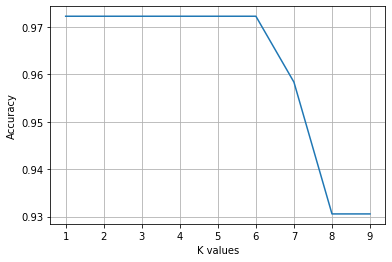

In [100]:
#Best K 
scores=[]
for e in range(1,10):
    knn2 = KNeighborsClassifier(n_neighbors = e )
    knn2.fit(x_train,y_train)
    scores.append(knn2.score(x_test,y_test))

plt.plot(range(1,10),scores)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.grid("on")
plt.show

#### we have found the best K values. After K=6, accuracy is going down, that's not good. The accuracy should have value as posible as high